In [1]:
%matplotlib inline
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

In [2]:
datafile = uproot.open("/mnt/Storage/fmanzali/FlatComplete/eplus_hits_dn_0.root")
datafile.keys()

[b'lpmt_hits;187',
 b'lpmt_hits;186',
 b'spmt_hits;5',
 b'spmt_hits;4',
 b'true_info;1',
 b'lpmt_pos;1',
 b'spmt_pos;1']

In [3]:
trueINFO = datafile["true_info"]
trueINFO_pd = trueINFO.pandas.df()
trueINFO_pd

,evtID,E,x,y,z,R
entry,,,,,,
0,0,4.747791,8290.779297,11995.618164,911.742859,14610.377930
1,1,3.919721,11397.631836,5407.449707,-7409.082031,14630.140625
2,2,6.823932,14063.337891,-3812.854004,246.652802,14573.131836
3,3,3.765940,-2377.930664,-16317.702148,3315.590332,16820.080078
4,4,3.217473,-8617.117188,868.511597,9730.986328,13026.938477
...,...,...,...,...,...,...
99995,99995,2.863076,-13419.921875,-9861.937500,-440.423920,16659.714844
99996,99996,4.219520,-8444.309570,-3457.845703,-8388.169922,12394.533203
99997,99997,7.254750,-15518.010742,7718.442383,-1728.948975,17417.585938


In [4]:
data = []

for i in range(0,100000):
    if trueINFO_pd.loc[i, 'x'] < 1000 and trueINFO_pd.loc[i, 'x'] > -1000 and trueINFO_pd.loc[i, 'y'] < 1000 and trueINFO_pd.loc[i, 'y'] > -1000 and trueINFO_pd.loc[i, 'z'] < 1000 and trueINFO_pd.loc[i, 'z'] > -1000 :
            data.append({'evtID': i, 'E': trueINFO_pd.loc[i, 'E'],
                       'x': trueINFO_pd.loc[i, 'x'],
                       'y': trueINFO_pd.loc[i, 'y'],
                       'z': trueINFO_pd.loc[i, 'z'],
                       'R': trueINFO_pd.loc[i, 'R']})
            
trueINFO_pd_0 = pd.DataFrame(data)
trueINFO_pd_0

,evtID,E,x,y,z,R
0,699,7.609658,42.830978,-3.205097,209.073257,213.439438
1,4111,2.528170,221.510376,344.314728,996.814453,1077.617065
2,5420,2.234076,766.803040,-612.508972,-318.151764,1031.685303
3,6186,2.314943,62.534203,-329.544708,-906.907715,966.949768
4,8079,5.944147,-760.198730,-630.583252,-563.985474,1137.372803
5,8374,6.205061,-80.222366,-532.335144,-699.449646,882.635925
6,15803,4.192854,-933.942810,326.164490,-843.011902,1299.731323
7,21292,3.545559,619.841248,833.320923,-698.554077,1251.640869
8,24783,4.457690,826.594238,205.972305,-497.811584,986.660522
9,29390,5.865944,-729.061401,-681.727661,789.136169,1272.406738


In [27]:
largePMT = datafile["lpmt_hits"]
ev4111 = largePMT.pandas.df(entrystart=4111, entrystop=4112)
ev4111.loc[4111]

,nHits,pmtID,hitTime,isDN
subentry,,,,
0,4804,9612,157.452698,False
1,4804,14667,211.240814,False
2,4804,14705,312.887329,False
3,4804,3464,120.365211,False
4,4804,4565,104.362312,False
...,...,...,...,...
4799,4804,17661,664.707703,True
4800,4804,17675,849.110840,True
4801,4804,17683,210.489319,True


In [81]:
def no_DN (frame):
    data = []

    i = frame.index[0][0]
    a = 0
    for j in range(0,len(frame.loc[i])): 
        if frame.loc[i, 'isDN'].loc[j] == False:
            a += 1
    for j in range(0,len(frame.loc[i])): 
        if frame.loc[i, 'isDN'].loc[j] == False and frame.loc[i, 'hitTime'].loc[j] < 300:
            data.append({'subentry': j, 'nHits': a,
                       'pmtID': frame.loc[i, 'pmtID'].loc[j],
                       'hitTime': frame.loc[i, 'hitTime'].loc[j] })
            
    frame_noDN = pd.DataFrame(data)
    return frame_noDN

In [82]:
ev4111_noDN = no_DN(ev4111)
ev4111_noDN

,subentry,nHits,pmtID,hitTime
0,0,4071,9612,157.452698
1,1,4071,14667,211.240814
2,3,4071,3464,120.365211
3,4,4071,4565,104.362312
4,5,4071,16585,156.977905
...,...,...,...,...
3940,4066,4071,6361,96.324631
3941,4067,4071,14174,158.471695
3942,4068,4071,8409,113.467064
3943,4069,4071,8134,100.106010


In [46]:
ev4111_noDN.loc[:, 'pmtID'].loc[0]

9612

In [32]:
PMT_pos = datafile["lpmt_pos"]
PMT_pos_pd = PMT_pos.pandas.df()
PMT_pos_pd

,pmt_id,pmt_x,pmt_y,pmt_z
entry,,,,
0,0,1.049021e+03,0.000000,19171.320312
1,1,9.084785e+02,524.510315,19171.320312
2,2,5.245103e+02,908.478516,19171.320312
3,3,6.423399e-14,1049.020630,19171.320312
4,4,-5.245103e+02,908.478516,19171.320312
...,...,...,...,...
17734,17734,1.904750e+04,-2395.499268,-307.276520
17735,17735,1.910673e+04,-1865.088745,-307.276520
17736,17736,1.915119e+04,-1333.236816,-307.276520


In [33]:
def new_spherical (xyz):
    data = []
    for i in range(0, len(xyz)):
        r = np.sqrt(xyz.loc[i, 'pmt_x']**2 + xyz.loc[0,'pmt_y']**2 + xyz.loc[i, 'pmt_z']**2)
        theta = np.arccos((xyz.loc[i, 'pmt_z'])/r)
        if xyz.loc[i, 'pmt_x'] == 0 and xyz.loc[i, 'pmt_y'] > 0:
            phi = np.pi/2
        if xyz.loc[i, 'pmt_x'] == 0 and xyz.loc[i, 'pmt_y'] > 0:
            phi = 3*np.pi/2
        if (xyz.loc[i, 'pmt_x'] > 0 and xyz.loc[i, 'pmt_y'] >= 0):
             phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x']))
        if (xyz.loc[i, 'pmt_x'] > 0 and xyz.loc[i, 'pmt_y'] <= 0):
             phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x'])) +2*np.pi
        elif (xyz.loc[i, 'pmt_x'] < 0 and xyz.loc[i, 'pmt_y'] > 0) or (xyz.loc[i, 'pmt_x'] < 0 and xyz.loc[i, 'pmt_y'] < 0):
            phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x'])) + np.pi
        data.append({'pmt_id': i,
                    'pmt_r': r,
                    'pmt_theta': theta,
                    'pmt_phi': phi })
    rtp = pd.DataFrame(data)
    return rtp

In [34]:
PMT_spher_pd = new_spherical(PMT_pos_pd)
PMT_spher_pd

,pmt_id,pmt_r,pmt_theta,pmt_phi
0,0,19199.999136,0.054664,6.283185
1,1,19192.833447,0.047352,0.523599
2,2,19178.494039,0.027352,1.047198
3,3,19171.320312,0.000000,1.570796
4,4,19178.494039,0.027352,2.094395
...,...,...,...,...
17734,17734,19049.976396,1.586927,6.158078
17735,17735,19109.197230,1.586877,6.185879
17736,17736,19153.654386,1.586840,6.213681
17737,17737,19183.310731,1.586815,6.241483


In [47]:
def ev_map (ev):
    data = []
    for i in range (0, len(ev)):
        data.append({'pmt_id': ev.loc[:, 'pmtID'].loc[i], 
                 'pmt_theta': PMT_spher_pd.loc[ev.loc[:, 'pmtID'].loc[i], 'pmt_theta'],
                 'pmt_phi': PMT_spher_pd.loc[ev.loc[:, 'pmtID'].loc[i], 'pmt_phi'],
                 'hitTime': ev.loc[:, 'hitTime'].loc[i] })
    
    ev_map = pd.DataFrame(data)
    return ev_map

In [83]:
map4111 = ev_map (ev4111_noDN)
map4111

,pmt_id,pmt_theta,pmt_phi,hitTime
0,9612,2.755739,6.021386,157.452698
1,14667,2.151557,4.125175,211.240814
2,3464,0.340245,1.306055,120.365211
3,4565,0.474122,1.849872,104.362312
4,16585,2.213410,4.893100,156.977905
...,...,...,...,...
3940,6361,0.051339,1.556116,96.324631
3941,14174,2.563727,1.849872,158.471695
3942,8409,1.481113,3.933941,113.467064
3943,8134,1.467112,2.557757,100.106010


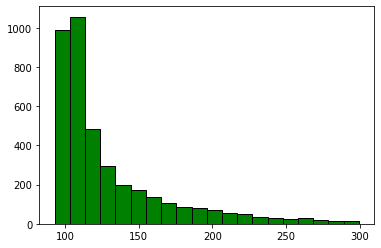

In [84]:
time4111 = map4111.loc[:, 'hitTime']
time4111
plt.hist(time4111, bins=20, ec='black', color='green')
plt.show()

In [158]:
def ev_mollweide (ev_map):
    # Set the coordinates for the input
    nside = 16
    npix = hp.nside2npix(nside)

    # Coordinates and the density field f
    thetas = PMT_spher_pd.loc[:, 'pmt_theta']
    phis = PMT_spher_pd.loc[:, 'pmt_phi']
    hitTime = ev_map.loc[:, 'hitTime']

    # Go from HEALPix coordinates to indices
    indices = hp.ang2pix(nside, thetas, phis)

    # Initate the map and fill it with the values
    hpxmap = np.zeros(npix, dtype=np.float)
    for i in range(len(ev_map)):
        hpxmap[indices[ev_map.loc[:, 'pmt_id'].loc[i]]]  = hitTime.loc[i]

    # Inspect the map
    hp.mollview(hpxmap)

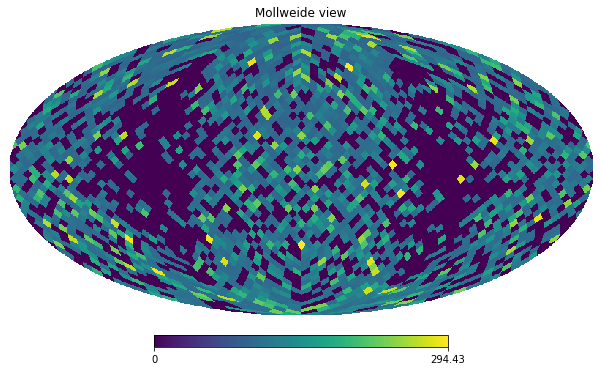

In [159]:
ev_mollweide(map4111)